In [3]:
import os

diretorio = 'C:\\Users\\lucas\\Downloads\\TCC-FSS\\esp_quad_lucas'

arquivos_txt = [arquivo for arquivo in os.listdir(diretorio) if arquivo.endswith('.txt')]

# Processa cada arquivo .txt
for arquivo_txt in arquivos_txt:
    arquivo_entrada = os.path.join(diretorio, arquivo_txt)
    arquivo_saida = os.path.join(diretorio, arquivo_txt.replace('.txt', '.csv'))
    
    with open(arquivo_entrada, 'r') as txt_file, open(arquivo_saida, 'w', newline='') as csv_file:
        for linha in txt_file:
            # Remove espaços no início e no final, e divide a linha nos espaços
            valores = linha.strip().split()
            
            linha_csv = ','.join(valores)
            
            csv_file.write(linha_csv + '\n')
    
    print(f'Arquivo "{arquivo_saida}" gerado com sucesso.')

print('Todos os arquivos .txt foram convertidos para .csv com sucesso.')


Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_2.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_4.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_6.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_0_8.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_6_w_1.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_2.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_4.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_6.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h_0_02_p_10_d_7_5_w_0_8.csv" gerado com sucesso.
Arquivo "C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\h

In [1]:
import pandas as pd

db = pd.read_csv('esp_quad_lucas/h_1_6_p_20_d_10_w_1.csv')
db.head()

,Frequencia(GHZ),Atenuacao(dB)
0,5.0,-2.287071
1,5.5,-3.268917
2,6.0,-5.001817
3,6.5,-8.816341
4,7.0,-25.428046


In [3]:
import matplotlib.pyplot as plt

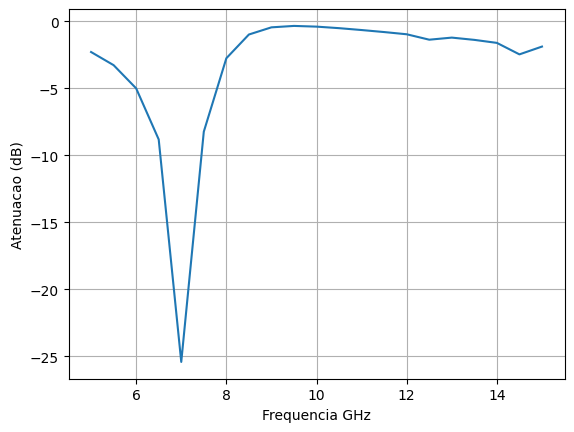

In [4]:
plt.figure()

x = db['Frequencia(GHZ)']
y = db['Atenuacao(dB)']

plt.grid()
plt.plot(x, y)
plt.xlabel("Frequencia GHz")
plt.ylabel("Atenuacao (dB)")
plt.show()


In [5]:
resonant_frequency = db['Atenuacao(dB)'].min()
resonant_frequency

-25.428045994311624

In [6]:
db

,Frequencia(GHZ),Atenuacao(dB)
0,5.0,-2.287071
1,5.5,-3.268917
2,6.0,-5.001817
3,6.5,-8.816341
4,7.0,-25.428046
5,7.5,-8.235657
6,8.0,-2.753601
7,8.5,-0.980174
8,9.0,-0.444286
9,9.5,-0.338534


In [7]:
BW = db[(db['Atenuacao(dB)'] < -10)]

BW

,Frequencia(GHZ),Atenuacao(dB)
4,7.0,-25.428046


In [46]:
import pandas as pd
import os

diretorio_entrada = 'C:\\Users\\lucas\\Downloads\\TCC-FSS\\esp_quad_lucas'
diretorio_saida = 'C:\\Users\\lucas\\Downloads\\TCC-FSS\\esp_quad_lucas\\resultados'

if not os.path.exists(diretorio_saida):
    os.makedirs(diretorio_saida)

for arquivo in os.listdir(diretorio_entrada):
    if arquivo.endswith('.csv'):
        caminho_completo = os.path.join(diretorio_entrada, arquivo)
        
        db = pd.read_csv(caminho_completo)
        
        try:
            resonant_frequency = db['Atenuacao(dB)'].min()
        except KeyError:
            print(f"Erro: A coluna 'Atenuacao(dB)' não foi encontrada no arquivo {arquivo}.")
            continue  
        
        # Identificar todos os índices onde a atenuação é menor que -10 dB
        indices_abaixo_10 = db.index[db['Atenuacao(dB)'] < -10].tolist()
        
        if indices_abaixo_10:
            # Considerar o caso de um intervalo único ou múltiplos intervalos
            primeiro_index = indices_abaixo_10[0]
            ultimo_index = indices_abaixo_10[-1]
            
            if primeiro_index == ultimo_index:
                if primeiro_index > 0:
                    primeiro_index -= 1
                if ultimo_index < len(db) - 1:
                    ultimo_index += 1

            BW = db.iloc[ultimo_index]['Frequencia(GHZ)'] - db.iloc[primeiro_index]['Frequencia(GHZ)']

            resultados_df = pd.DataFrame({
                'resonant_frequency(dB)': [resonant_frequency],
                'BW(GHZ)': [BW],
            })
        else:
            print(f"Nenhum valor abaixo de -10 dB encontrado no arquivo {arquivo}.")
            continue

        nome_arquivo_saida = f"{os.path.splitext(arquivo)[0]}.csv"
        caminho_arquivo_saida = os.path.join(diretorio_saida, nome_arquivo_saida)
        
        resultados_df.to_csv(caminho_arquivo_saida, index=False)

        print(f'Resultados salvos em: {caminho_arquivo_saida}')


Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_2.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_4.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_6.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_0_8.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_6_w_1.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_2.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_4.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_6.csv
Resultados salvos em: C:\Users\lucas\Downloads\TCC-FSS\esp_quad_lucas\resultados\h_0_02_p_10_d_7_5_w_0_8.csv
Resultados salvos em: C:\Users\